# Customer Segmentation in Retail

Sample Data is given for Indian Supermarket store ABC:

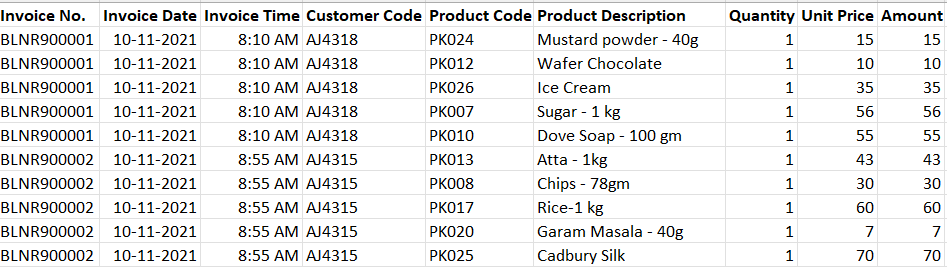 

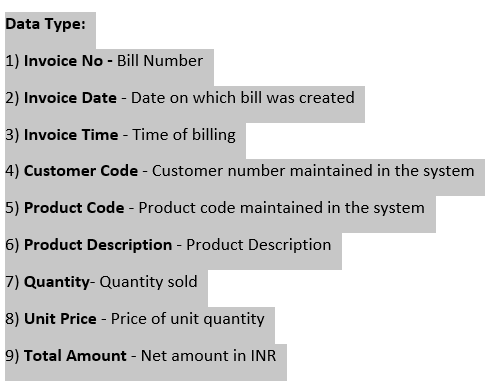

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data=pd.read_csv('Clustering_Retail.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Invoice No.          300 non-null    object
 1   Invoice Date         300 non-null    object
 2   Invoice Time         300 non-null    object
 3   Customer Code        300 non-null    object
 4   Product Code         300 non-null    object
 5   Product Description  300 non-null    object
 6   Quantity             300 non-null    int64 
 7   Unit Price           300 non-null    int64 
 8   Amount               300 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.2+ KB


data.describe()


In [5]:
grouped=data.groupby('Customer Code').agg({'Invoice No.' : 'count', 'Amount' : 'sum'}).rename(columns = {'Invoice No.' : 'Count',
                                                                                                        'Amount' : 'Total Amount'})

In [6]:
grouped

,Count,Total Amount
Customer Code,,
AJ4301,16,583
AJ4302,12,522
AJ4303,13,572
AJ4304,14,562
AJ4305,16,772
AJ4306,13,594
AJ4307,14,601
AJ4308,7,180
AJ4309,16,931


In [7]:
grouped=grouped.reset_index()

In [8]:
grouped


,Customer Code,Count,Total Amount
0,AJ4301,16,583
1,AJ4302,12,522
2,AJ4303,13,572
3,AJ4304,14,562
4,AJ4305,16,772
5,AJ4306,13,594
6,AJ4307,14,601
7,AJ4308,7,180
8,AJ4309,16,931
9,AJ4310,15,722


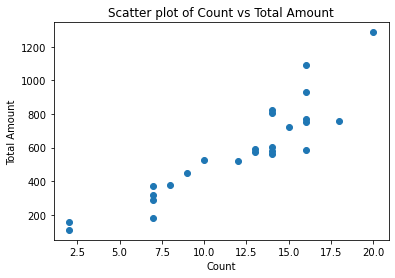

In [9]:
plt.scatter(x=grouped['Count'],y=grouped['Total Amount'], cmap='red')
plt.xlabel('Count')
plt.ylabel('Total Amount')
plt.title("Scatter plot of Count vs Total Amount")
plt.show()

In [10]:
#Count number of transactions and total amount spent by Customer
X=grouped[['Count', 'Total Amount']]

In [11]:
X.head()

,Count,Total Amount
0,16,583
1,12,522
2,13,572
3,14,562
4,16,772


In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

data_scaled

array([[ 0.86066297, -0.02313529],
       [ 0.        , -0.24227388],
       [ 0.21516574, -0.06265208],
       [ 0.43033148, -0.09857644],
       [ 0.86066297,  0.65583511],
       [ 0.21516574,  0.01638151],
       [ 0.43033148,  0.04152856],
       [-1.07582871, -1.47088697],
       [ 0.86066297,  1.22703242],
       [ 0.64549722,  0.47621331],
       [ 0.43033148,  0.7851628 ],
       [ 0.86066297,  1.79822974],
       [ 1.72132593,  2.50593962],
       [-0.43033148, -0.22790414],
       [-1.07582871, -0.97153838],
       [-2.15165741, -1.72235749],
       [-0.64549722, -0.50092927],
       [ 0.43033148,  0.8354569 ],
       [-1.07582871, -0.78832414],
       [ 0.43033148, -0.02672772],
       [-2.15165741, -1.56069787],
       [-1.07582871, -1.09008876],
       [-0.86066297, -0.76317709],
       [ 0.86066297,  0.59117126],
       [ 1.29099445,  0.61631831]])

In [13]:
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.500000e+01,2.500000e+01
mean,-8.881784e-18,-1.820766e-16
std,1.020621e+00,1.020621e+00
min,-2.151657e+00,-1.722357e+00
25%,-8.606630e-01,-7.631771e-01
50%,4.303315e-01,-2.672772e-02
75%,8.606630e-01,6.163183e-01
max,1.721326e+00,2.505940e+00


In [14]:
from sklearn.cluster import KMeans
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [15]:
# inertia on the fitted data
kmeans.inertia_

9.264363910447479

C:\Users\Debopriyo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

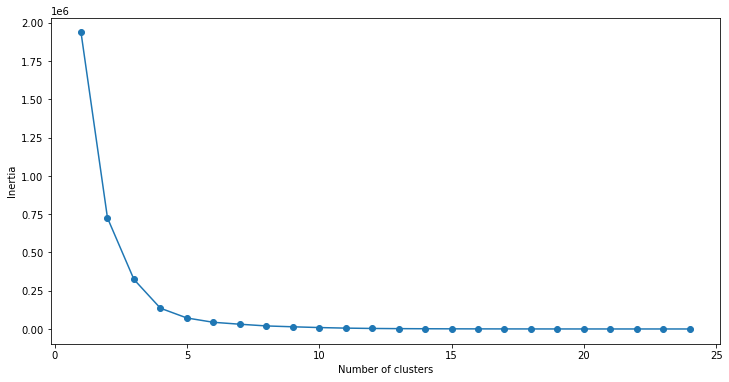

In [16]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,25):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,25), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
# Silhouette analysis

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5799733472366997
For n_clusters=3, the silhouette score is 0.518693657444478
For n_clusters=4, the silhouette score is 0.5268218626243396
For n_clusters=5, the silhouette score is 0.524769583494117
For n_clusters=6, the silhouette score is 0.49467997280215653
For n_clusters=7, the silhouette score is 0.49075527778222877


In [18]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_scaled)
c_pred=kmeans.predict(data_scaled)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [19]:
# assign the label
grouped['Cluster_Id'] = kmeans.labels_
grouped

,Customer Code,Count,Total Amount,Cluster_Id
0,AJ4301,16,583,1
1,AJ4302,12,522,1
2,AJ4303,13,572,1
3,AJ4304,14,562,1
4,AJ4305,16,772,1
5,AJ4306,13,594,1
6,AJ4307,14,601,1
7,AJ4308,7,180,0
8,AJ4309,16,931,2
9,AJ4310,15,722,1


In [20]:
#Count number of customers per cluster
grouped['Cluster_Id'].value_counts()

1    13
0     9
2     3
Name: Cluster_Id, dtype: int64

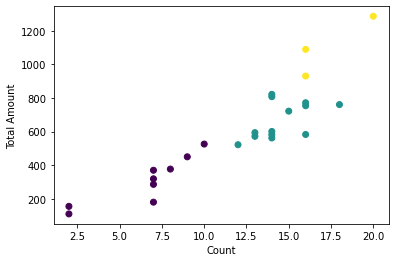

In [21]:
#Visualise data points

X = grouped[["Count","Total Amount"]]
plt.scatter(X["Count"],X["Total Amount"],c=c_pred)
plt.xlabel('Count')
plt.ylabel('Total Amount')
plt.show()

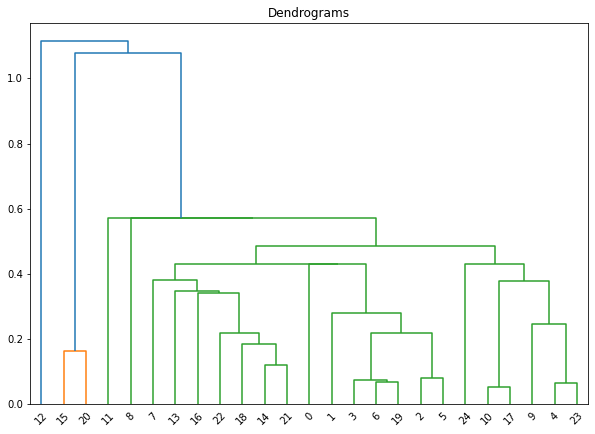

In [22]:
# Hierarchial clustering using single linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

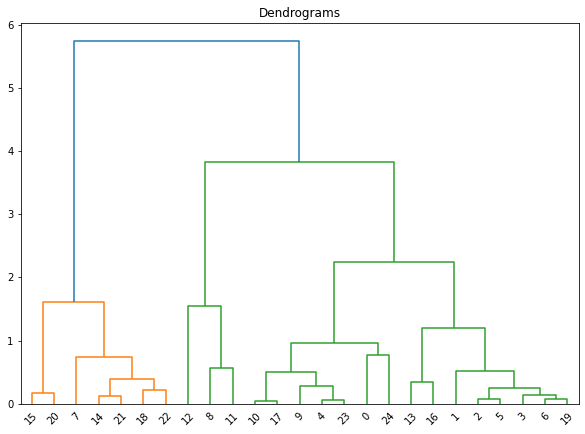

In [23]:
# Hierarchial clustering using complete linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0], dtype=int64)

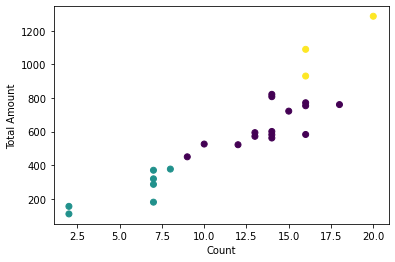

In [25]:
# Visualize the data points
X = grouped[["Count","Total Amount"]]
#Visualise data points
plt.scatter(X["Count"],X["Total Amount"],c=cluster.labels_)
plt.xlabel('Count')
plt.ylabel('Total Amount')
plt.show()